# cargamos las librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression

## Cargamos los dataframes

In [2]:
dataframe = pd.read_csv('fuel.csv', encoding='ISO-8859-1')
dataframe.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


## Cambiamos los nombres de las columnas para hacerlos más entendibles.
- Lo hacemos con el .rename(colums={clave=VALOR ACTUAL : valor=VALOR CAMBIADO}) <= formato diccionario

In [3]:
dataframe = dataframe.rename(columns={'Vehicle Class': 'veicle_class','Engine Size (L)': 'engine_size_L', 'Fuel Type': 'fuel_type','Fuel Consumption (L/100Km)': 'fuel_consumption_100','Hwy (L/100 km)': 'fuel_consumption_100_hwy', 'Comb (L/100 km)': 'conb_L_100', 'Comb (mpg)': 'comb_mpg', 'CO2 Emissions (g/km)': 'co2_g_km','CO2 Rating': 'co2_rating', 'Smog Rating': 'smog_rating' })

## Creamos un nuevo dataframe con las columnas que nos interesan a partir de una lista

In [4]:
columnas_interes = ['engine_size_L', 'Cylinders', 'fuel_consumption_100','fuel_consumption_100_hwy', 'conb_L_100',  'comb_mpg', 'co2_g_km', 'co2_rating', 'smog_rating']
dataframe_limpio = dataframe[columnas_interes]



## Creamos un mapa de calor (heatmap) para ver la relación entre los datos del dataframe


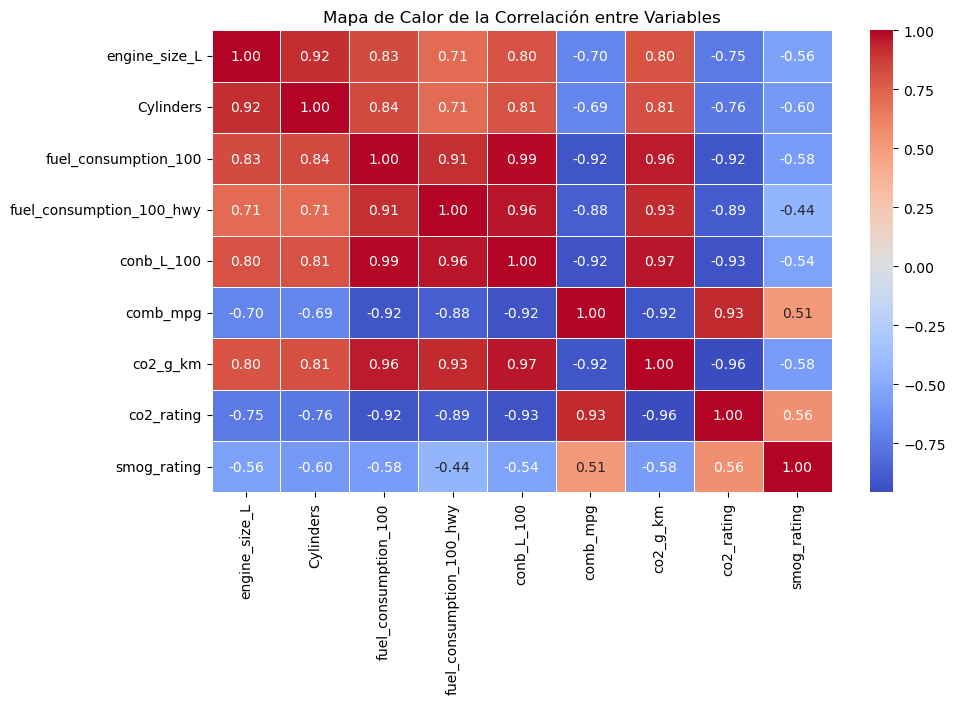

In [5]:
corr = dataframe_limpio.corr()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()

# corr

## Creamos los datos para el entrenamiento (x, y).
- x son los datos que le damos al modelo para que aprenda la entrada del dato que queremos usar para predecir. TIENE que ser un array de numpy bidimensional (una matriz) se le agrega el .values para trabajar con solo los datos, no con un dataframe. /TODO
- y son los datos que vamos a entrenar como salida del modelo para los datos que queremos predecir

In [6]:
x = dataframe_limpio[['fuel_consumption_100']].values

y = dataframe_limpio['co2_g_km']


## Dividimos los datos de entrenamiento en _train y _ test, esto se hace para entrenar con los _train y testear los resultados con el _test. 

Dentro de la llamada al método se le pasan los datos del paso anterior x, y. El test_size es para definir como se separan los datos entre train y test, en este caso el test_size=0.30 indica que el 30% de los datos se usan para test y el resto 70% para entrenamiento

In [7]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)



## De la librería sklearn.linear_model importamos la LinearRegression

- creamos una instancia de LinearRegression()
- la usamos para entrenar con .fit y le pasamos los datos de entrenamiento x_train, y_train

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression()

## Dibujamos el gráfico

- con .scatter dibujamos los datos de entrenamiento
- con .plot dibujamos una línea con el .predict de x_train
- .show lo dibujamos

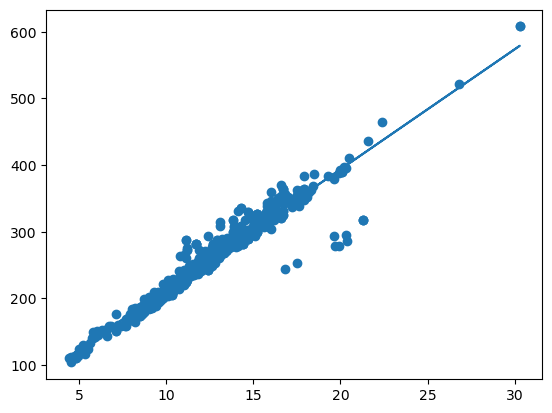

In [9]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train))
plt.show()

## Hacemos una predicción con un dato inventado el np.array([[30]])

In [10]:
consumo_autopista_inventado = np.array([[30]])  # Importante que esté en formato 2D
emisiones_prediccion = regressor.predict(consumo_autopista_inventado)


print(f"Las emisiones estimadas para un consumo de {consumo_autopista_inventado[0][0]} son {emisiones_prediccion[0]:,.2f} g/Km")

Las emisiones estimadas para un consumo de 30 son 573.70 g/Km


## Así podemos ver todas las predicciones del x_test



In [11]:
emisiones_prediccion = regressor.predict(x_test)
emisiones_prediccion

array([255.19759254, 213.80980426, 233.60396387, 208.4113971 ,
       251.59865443, 219.20821143, 206.61192804, 177.82042315,
       230.00502576, 208.4113971 , 237.20290198, 267.79387593,
       197.61458276, 237.20290198, 186.81776843, 172.42201599,
       231.80449482, 262.39546876, 217.40874237, 253.39812348,
       224.6066186 , 226.40608765, 226.40608765, 298.38484987,
       185.01829938, 391.95724075, 269.59334498, 231.80449482,
       368.56414303, 255.19759254, 197.61458276, 174.22148504,
       319.97847853, 417.14980753, 318.17900948, 323.57741664,
       249.79918537, 212.01033521, 265.99440687, 230.00502576,
       185.01829938, 237.20290198, 251.59865443, 269.59334498,
       228.20555671, 402.75405508, 269.59334498, 215.60927332,
       323.57741664, 224.6066186 , 314.58007137, 230.00502576,
       368.56414303, 249.79918537, 203.01298993, 210.21086615,
       204.81245899, 221.00768048, 319.97847853, 258.79653065,
       181.41936126, 307.38219515, 226.40608765, 301.98

## Hacemos el cálculo del error cuadrático medio y el coeficiente de determinación

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
# Realizar predicciones en ambos conjuntos
y_train_pred = regressor.predict(x_train)
y_test_pred  = regressor.predict(x_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("Conjunto de Entrenamiento:")
print("MSE: {:.2f}".format(mse_train))
print("R²: {:.2f}".format(r2_train))

print("\nConjunto de Test:")
print("MSE: {:.2f}".format(mse_test))
print("R²: {:.2f}".format(r2_test))



Conjunto de Entrenamiento:
MSE: 323.90
R²: 0.92

Conjunto de Test:
MSE: 364.90
R²: 0.91


## Calculamos el RMSE el error cuadrático medio en las unidades que estamos trabajando.

comparamos el RMSE con una medida de entrenamiento en este caso 18/19 sobre unidades de 172 aprox, esto hace que junto con el R²: 0.92 hace que el error sea de menos del 10%

In [13]:
rmse_train = math.sqrt(mse_train)
rmse_test  = math.sqrt(mse_test)

print("RMSE Entrenamiento: {:.2f}".format(rmse_train))
print("RMSE Test: {:.2f}".format(rmse_test))

RMSE Entrenamiento: 18.00
RMSE Test: 19.10


## Validación cruzada


In [14]:
from sklearn.model_selection import cross_val_score
# Realizamos validación cruzada con 5 folds (particiones)
validacion_cruzada = cross_val_score(regressor, x_train, y_train, cv=10)



print("Puntajes en cada fold:", validacion_cruzada)
print("Puntaje promedio:", validacion_cruzada.mean())


Puntajes en cada fold: [0.93452282 0.85631057 0.90977939 0.93743092 0.97806882 0.96284338
 0.95606011 0.91893169 0.86705324 0.90428729]
Puntaje promedio: 0.9225288215828759


## Hacemos otro entrenamiento completo con otras variables

- en este caso añadimos brilli brilli a la hora de pintar la gráfica

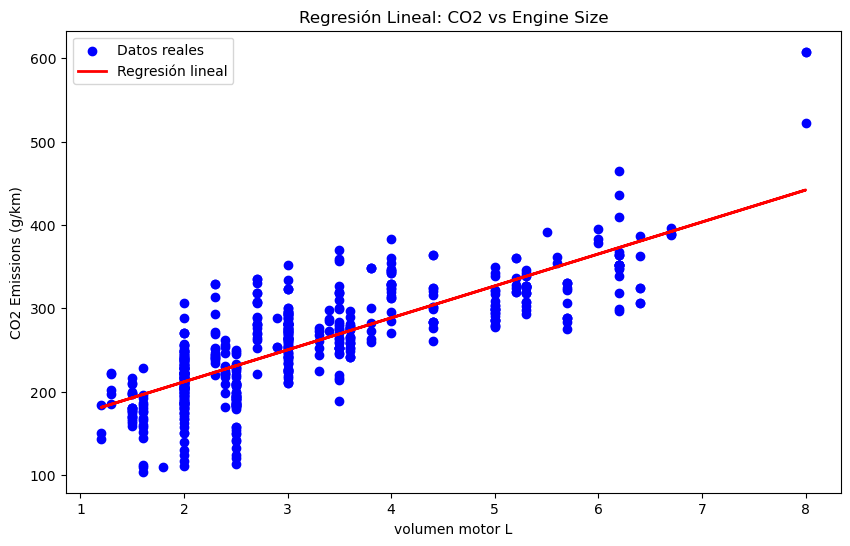

Coeficiente: 38.35968086886393 los grados de la recta dibujada
Intercepto: 135.18751220610778 donde empieza en altura la linea dibujada


In [15]:

# Seleccionar característica (Engine Size) y variable objetivo (CO2 Emissions)
X = dataframe_limpio[['engine_size_L']].values
y = dataframe_limpio['co2_g_km']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Entrenar modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicciones
y_pred = regressor.predict(X_test)

# Graficar en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('volumen motor L')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Regresión Lineal: CO2 vs Engine Size')
plt.legend()
plt.show()

# Imprimir coeficientes del modelo
print("Coeficiente:", regressor.coef_[0], "los grados de la recta dibujada")
print("Intercepto:", regressor.intercept_, "donde empieza en altura la linea dibujada")


## Hacemos otra predicción con datos inventados

In [16]:
cilindros_inventados = np.array([[8]])  # Importante que esté en formato 2D
emisiones_prediccion = regressor.predict(cilindros_inventados)

print(f"Las emisiones estimadas para un ctamaño de cilindros de {cilindros_inventados[0][0]} son {emisiones_prediccion[0]:,.2f} g/Km")

Las emisiones estimadas para un ctamaño de cilindros de 8 son 442.06 g/Km


## entrenamos un modelo con 2 datos de entrada

In [17]:
# Definir las variables independientes y la dependiente
x = dataframe_limpio[['Cylinders','fuel_consumption_100']].values
y = dataframe_limpio['co2_g_km']



# Dividir los datos en conjuntos de entrenamiento (70%) y de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Entrenar modelo
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicciones
y_pred = regressor.predict(x_test)


## Pintamos la comparación entre valores reales y predichos


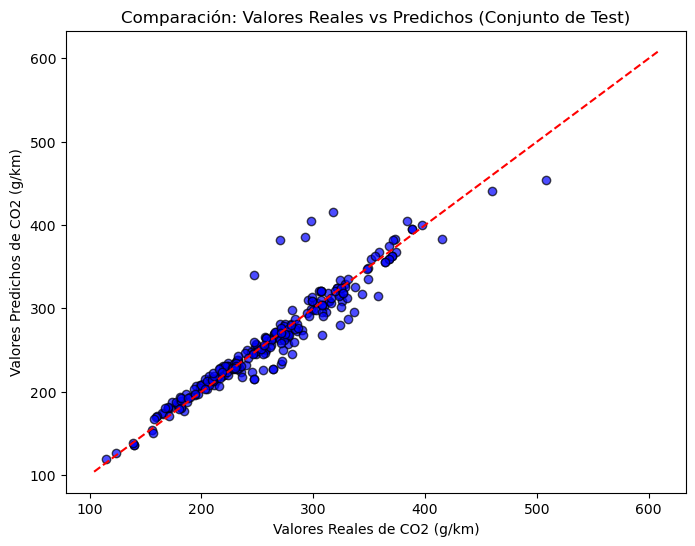

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel("Valores Reales de CO2 (g/km)")
plt.ylabel("Valores Predichos de CO2 (g/km)")
plt.title("Comparación: Valores Reales vs Predichos (Conjunto de Test)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia: ideal (predicción perfecta)
plt.show()


## Hacemos el cálculo del error cuadrático medio y el coeficiente de determinación

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
# Realizar predicciones en ambos conjuntos
y_train_pred = regressor.predict(x_train)
y_test_pred  = regressor.predict(x_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("Conjunto de Entrenamiento:")
print("MSE: {:.2f}".format(mse_train))
print("R²: {:.2f}".format(r2_train))

print("\nConjunto de Test:")
print("MSE: {:.2f}".format(mse_test))
print("R²: {:.2f}".format(r2_test))



Conjunto de Entrenamiento:
MSE: 322.59
R²: 0.92

Conjunto de Test:
MSE: 362.25
R²: 0.91


## Calcular Regularización Lasso L1, Ridge L2 y ElasticNet

- vemos que en un modelo de solo dos variables de entrada no necesita casi regularización

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# Suponiendo que ya tienes definidos x e y
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    validacion_cruzada = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - MSE: {-np.mean(validacion_cruzada):.2f}")


LinearRegression - MSE: 364.91
Ridge - MSE: 364.87
Lasso - MSE: 364.77
ElasticNet - MSE: 363.75


## Vamos a tener en cuenta todas las variables que nos aporta nuestro dataframe y vemos como afecta cada regularización

In [21]:
# Definir las variables independientes y la dependiente
x = dataframe_limpio[['engine_size_L', 'Cylinders', 'fuel_consumption_100','fuel_consumption_100_hwy', 'conb_L_100',  'comb_mpg', 'co2_rating', 'smog_rating']].values
y = dataframe_limpio['co2_g_km']



# Dividir los datos en conjuntos de entrenamiento (70%) y de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Entrenar modelo
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicciones
y_pred = regressor.predict(x_test)


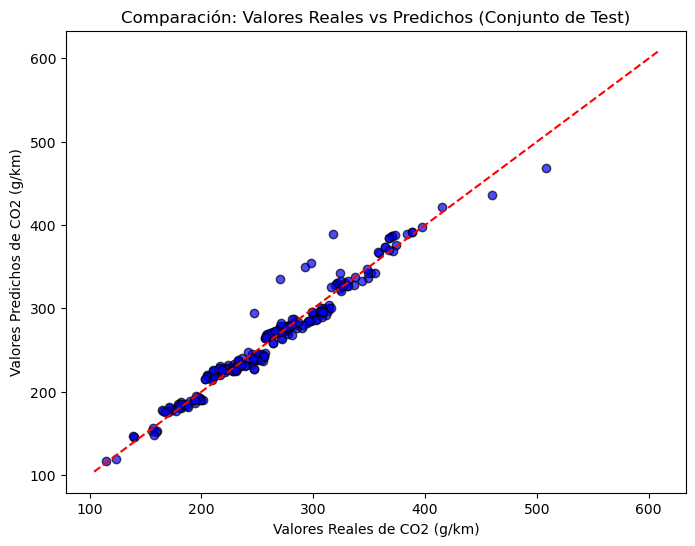

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel("Valores Reales de CO2 (g/km)")
plt.ylabel("Valores Predichos de CO2 (g/km)")
plt.title("Comparación: Valores Reales vs Predichos (Conjunto de Test)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia: ideal (predicción perfecta)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# Realizar predicciones en ambos conjuntos
y_train_pred = regressor.predict(x_train)
y_test_pred  = regressor.predict(x_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("Conjunto de Entrenamiento:")
print("MSE: {:.2f}".format(mse_train))
print("R²: {:.2f}".format(r2_train))

print("\nConjunto de Test:")
print("MSE: {:.2f}".format(mse_test))
print("R²: {:.2f}".format(r2_test))

Conjunto de Entrenamiento:
MSE: 137.48
R²: 0.97

Conjunto de Test:
MSE: 150.68
R²: 0.96


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# Suponiendo que ya tienes definidos x e y
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    validacion_cruzada = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - MSE: {-np.mean(validacion_cruzada):.2f}")

LinearRegression - MSE: 232.24
Ridge - MSE: 231.73
Lasso - MSE: 233.45
ElasticNet - MSE: 233.30


## Probamos con una inversamente relacionada y que tiene poca relación según el heatmap

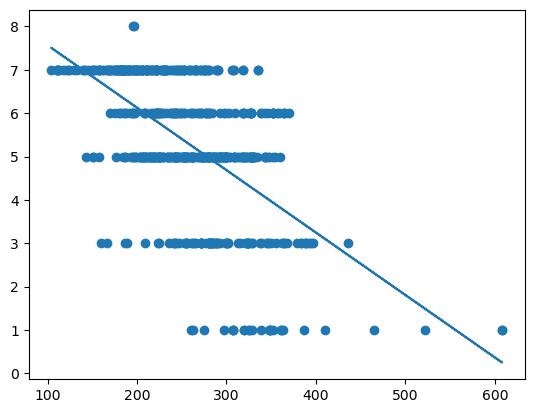

Conjunto de Entrenamiento:
MSE: 1.79
R²: 0.33

Conjunto de Test:
MSE: 1.96
R²: 0.34

LinearRegression - MSE: 1.89
Ridge - MSE: 1.89
Lasso - MSE: 1.89
ElasticNet - MSE: 1.89


In [25]:
# Definir las variables independientes y la dependiente
x = dataframe_limpio[['co2_g_km']].values
y = dataframe_limpio['smog_rating']



# Dividir los datos en conjuntos de entrenamiento (70%) y de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Entrenar modelo
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicciones
y_pred = regressor.predict(x_test)
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train))
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
# Realizar predicciones en ambos conjuntos
y_train_pred = regressor.predict(x_train)
y_test_pred  = regressor.predict(x_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("Conjunto de Entrenamiento:")
print("MSE: {:.2f}".format(mse_train))
print("R²: {:.2f}".format(r2_train))

print("\nConjunto de Test:")
print("MSE: {:.2f}".format(mse_test))
print("R²: {:.2f}\n".format(r2_test))

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# Suponiendo que ya tienes definidos x e y
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    validacion_cruzada = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - MSE: {-np.mean(validacion_cruzada):.2f}")


# Regularización

# Multivariable

# Evaluar el modelo

